In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [19]:
# Define directories for training and testing data
base_dir = 'archive'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [20]:
# Define image dimensions and batch size
img_width, img_height = 32, 32
batch_size = 16

In [21]:
# Create ImageDataGenerator for training and testing data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
# Generate training and testing datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale')

Found 24176 images belonging to 5 classes.
Found 6043 images belonging to 5 classes.


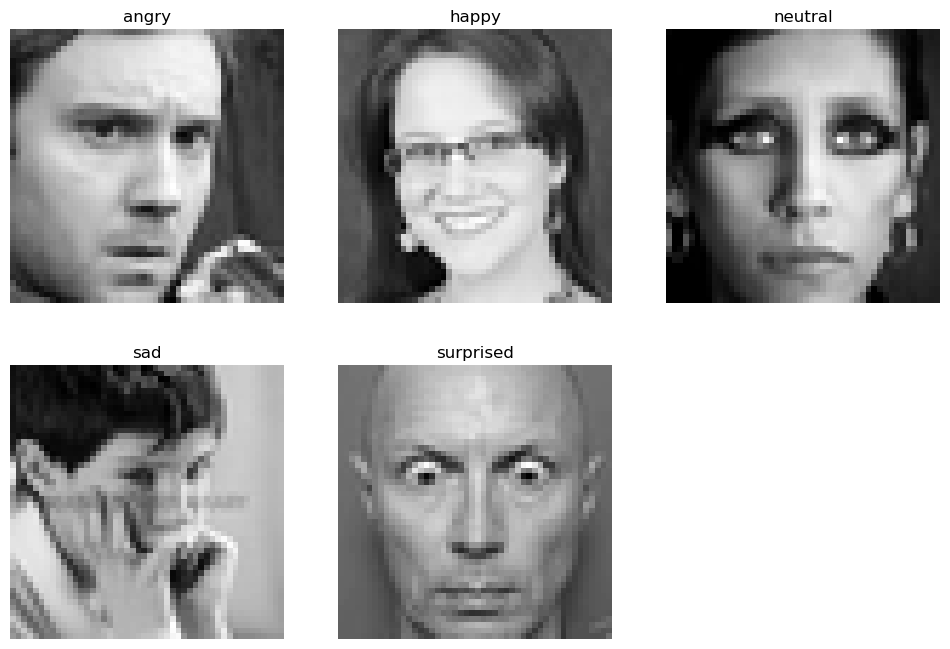

In [23]:
# Display sample images for different emotions
emotions = ['angry', 'happy', 'neutral', 'sad', 'surprised']

plt.figure(figsize=(12, 8))
for i, emotion in enumerate(emotions, start=1):
    img_path = os.path.join(train_dir, emotion, os.listdir(os.path.join(train_dir, emotion))[0])
    img = mpimg.imread(img_path)
    plt.subplot(2, 3, i)
    plt.imshow(img, cmap='gray')
    plt.title(emotion)
    plt.axis('off')

plt.show()

In [35]:
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

In [25]:
# Compile the model
optimizer = Adam(lr=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

In [26]:
# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[early_stop, model_checkpoint]
)

Epoch 1/50
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 221s 144ms/step - accuracy: 0.3158 - loss: 1.5323 - val_accuracy: 0.4633 - val_loss: 1.2988
Epoch 2/50
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.4751 - loss: 1.2648 - val_accuracy: 0.5424 - val_loss: 1.1305
Epoch 3/50
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.5459 - loss: 1.1315 - val_accuracy: 0.5626 - val_loss: 1.0664
Epoch 4/50
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.5762 - loss: 1.0620 - val_accuracy: 0.5658 - val_loss: 1.0641
Epoch 5/50
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.6076 - loss: 0.9963 - val_accuracy: 0.5974 - val_loss: 1.0074
Epoch 6/50
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.6283 - loss: 0.9462 - val_accuracy: 0.5777 - val_loss: 1.0438
Epoch 7/50
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.6385 - loss: 0.9102 - val_accuracy: 0.6022 - val_loss: 0.9957
Epoch 8/50
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.6549

In [27]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

378/378 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5850 - loss: 2.6131
Test Loss: 2.54538631439209
Test Accuracy: 0.588780403137207


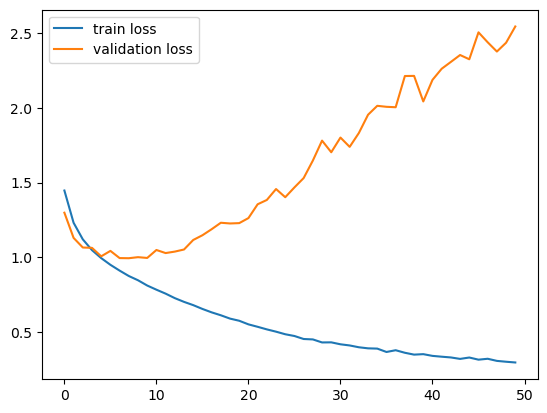

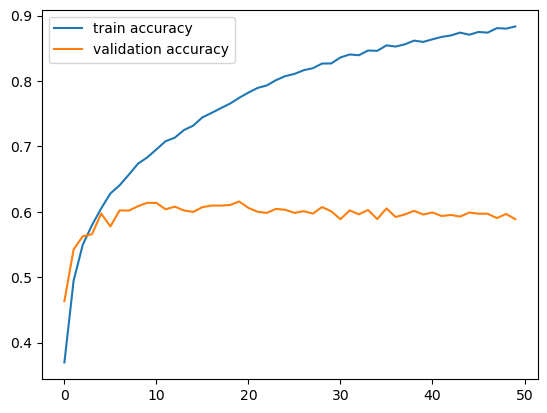

In [28]:
# Plotting loss and accuracy
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [29]:
def predict_emotion(image_path):
    img = image.load_img(image_path, target_size=(img_width, img_height), color_mode='grayscale')
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    emotion_labels = ['angry', 'happy', 'neutral', 'sad', 'surprised']
    predicted_class = np.argmax(prediction)
    predicted_emotion = emotion_labels[predicted_class]
    return predicted_emotion

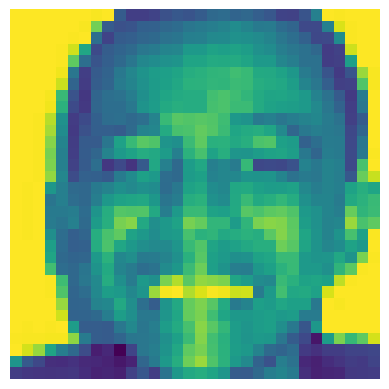

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Predicted Emotion: happy


In [30]:
# Load and display the specified image
img = tf.keras.preprocessing.image.load_img('archive/test/happy/im17.png', target_size=(img_width, img_height), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array /= 255.0  # Normalize pixel values to [0, 1]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Predict emotion for the specified image
prediction = predict_emotion('archive/test/happy/im17.png')
print("Predicted Emotion:", prediction)

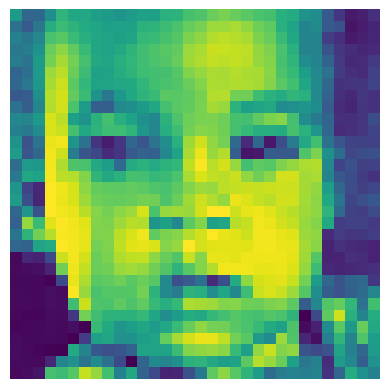

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Emotion: sad


In [31]:
# Load and display the specified image
img = tf.keras.preprocessing.image.load_img('archive/test/neutral/im292.png', target_size=(img_width, img_height), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array /= 255.0  # Normalize pixel values to [0, 1]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
# Predict emotion for the specified image
prediction = predict_emotion('archive/test/neutral/im292.png')
print("Predicted Emotion:", prediction)

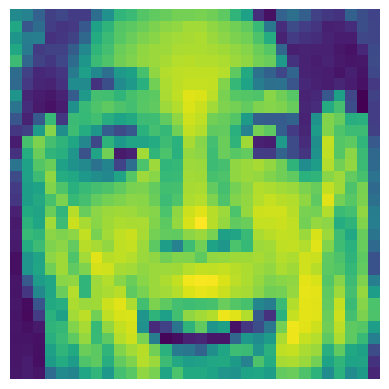

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Emotion: surprised


In [32]:
# Load and display the specified image
img = tf.keras.preprocessing.image.load_img('archive/test/surprised/im141.png', target_size=(img_width, img_height), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array /= 255.0  # Normalize pixel values to [0, 1]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
# Predict emotion for the specified image
prediction = predict_emotion('archive/test/surprised/im141.png')
print("Predicted Emotion:", prediction)

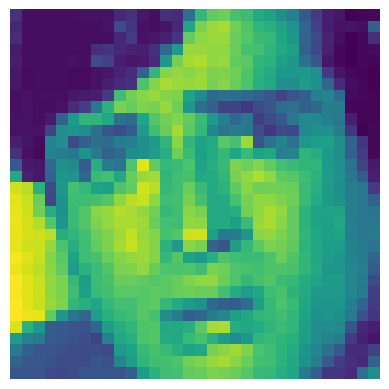

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Emotion: neutral


In [33]:
# Load and display the specified image
img = tf.keras.preprocessing.image.load_img('archive/test/sad/im1060.png', target_size=(img_width, img_height), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array /= 255.0  # Normalize pixel values to [0, 1]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
# Predict emotion for the specified image
prediction = predict_emotion('archive/test/sad/im1060.png')
print("Predicted Emotion:", prediction)

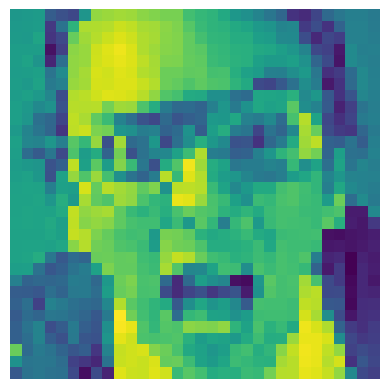

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Emotion: neutral


In [34]:
# Load and display the specified image
img = tf.keras.preprocessing.image.load_img('archive/test/angry/im204.png', target_size=(img_width, img_height), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array /= 255.0  # Normalize pixel values to [0, 1]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
# Predict emotion for the specified image
prediction = predict_emotion('archive/test/angry/im204.png')
print("Predicted Emotion:", prediction)